<a href="https://colab.research.google.com/github/GurungVinivesh/Cars_data/blob/main/Car_data_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratry Data Analysis Of Cars Data**

**Problem statement:** We have used Cars dataset from kaggle  with features including make, model, year, engine, and other properties of the car used to predict its price.

 **Importing necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import matplotlib.style as style
import seaborn as sns #visualization
%matplotlib inline
sns.set (color_codes=True)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import warnings
warnings.filterwarnings('ignore')

**Loading the data set into the dataframe**

In [5]:
##load the csv file
df = pd.read_csv('/content/Cars_data.csv')

In [6]:
##printing the head of the file for general idea
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Now we observe the each features present in the dataset.<br>

 `Make:` The Make feature is the company name of the Car.<br>
`Model:` The Model feature is the model or different version of Car models.<br>
`Year:`  The year describes the model has been launched.<br>
`Engine Fuel Type:` It defines the Fuel type of the car model.<br>
`Engine HP:` It's say the Horsepower that refers to the power an engine produces.<br>
`Engine Cylinders:` It define the nos of cylinders in present in the engine.<br>
`Transmission Type:` It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>
`Driven_Wheels:` The type of wheel drive.<br>
`No of doors:` It defined nos of doors present in the car.<br>
`Market Category:` This features tells about the type of car or which category the car belongs. <br>
`Vehicle Size:` It's say about the about car size.<br>
`Vehicle Style:` The feature is all about the style that belongs to car.<br>
`highway MPG:` The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.<br>
`city mpg:` City MPG refers to driving with occasional stopping and braking.<br>
`Popularity:` It can refered to rating of that car or popularity of car.<br>
`MSRP:` The price of that car.

**Check the datatypes**

In [10]:
#Now, getting the datatypes of each of the following cars in each column:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


**Dropping irrelevant colummns**

If we consider all columns present in the dataset then unneccessary columns will impact on the model's accuracy.<br>
Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us. It would reflect our model's accucary so we need to drop them. Otherwise it will affect our model.


The list cols_to_drop contains the names of the cols that are irrevalent, drop all these cols from the dataframe.


`cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]`

These features are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset.

In [13]:
#Now, We will initialize the drop of columns that are irrelevant
#We can also do it by making a list of 'cols_to_drop' = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]
#And by calling it in new dataframe as "df1 = df.drop([Cols_to_drop], axis = 1).set_index('Make')"

df1 = df.drop(["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"], axis=1).set_index('Make')

In [12]:
#Now, Printing the data without any irrelevant columns
df1.head()

,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
Make,,,,,,,,,
BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


**Renaming the columns**

Now, Its time for renaming the feature to useful feature name. It will help to use them in model training purpose.<br>

We have already dropped the unneccesary columns, and now we are left with useful columns. One extra thing that we would do is to rename the columns such that the name clearly represents the essence of the column.

The given dict represents (in key value pair) the previous name, and the new name for the dataframe columns

In [25]:
#Renaming the columns in the dataset
#It can also be done as "rename_columns = {'Engine HP': 'HP','Transmission Type':'Type', 'Driven_Wheels':'Axles', 'MSRP':'Price'}"
#Now using a pandas function to rename the columns

df1.rename(columns={'Engine HP': 'HP','Transmission Type':'Type', 'Driven_Wheels':'Axles', 'MSRP':'Price'},inplace=True)

In [23]:
#Printing the head of data frame
df1.head()

,Model,Year,HP,Engine Cylinders,Type,Axles,highway MPG,city mpg,Price
Make,,,,,,,,,
BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


**Dropping the duplicate rows**

There are many rows in the dataframe which are duplicate, and hence they are just repeating the information. Its better if we remove these rows as they don't add any value to the dataframe.

For given data, we would like to see how many rows were duplicates. For this, we will count the number of rows, remove the dublicated rows, and again count the number of rows.

In [26]:
#First let us see the number of rows before dropping the duplicate rows
df1.shape
#Below we got the number of rows is 11914 and number of columns is 9

(11914, 9)

In [28]:
#Now, dropping the duplicate rows from the columns
df1 = df1.drop_duplicates()

#Printing the new data without duplicates
df1.head()

,Model,Year,HP,Engine Cylinders,Type,Axles,highway MPG,city mpg,Price
Make,,,,,,,,,
BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [30]:
#As it is a large dataset we have to count wether the data has dropped the duplicate rows or not
df1.shape
#As you can see the number of rows has been decreased from 11914 to 10918 as the duplicate data from the dataset has been removed

(10918, 9)

**Dropping the Null or missing values**

Missing values are usually represented in the form of Nan or null or None in the dataset.

Finding whether we have null values in the data is by using the isnull() function.

There are many values which are missing, in pandas dataframe these values are reffered to as np.nan. We want to deal with these values beause we can't use nan values to train models. Either we can remove them to apply some strategy to replace them with other values.

To keep things simple we will be dropping nan values

In [32]:
#Firstly, we will check for null values
df1.isnull().sum()
#Below We can see that HP and Engine Cylinders have null values 69 and 30 respectively

,0
Model,0
Year,0
HP,69
Engine Cylinders,30
Type,0
Axles,0
highway MPG,0
city mpg,0
Price,0


As we can see that the HP and Cylinders have null values of 69 and 30. As these null values will impact on models' accuracy. So to avoid the impact we will drop the these values. As these values are small camparing with dataset  that will not impact any major affect on model accuracy so we will drop the values.

In [34]:
#Dropping the missing values
df1 = df1.dropna()

In [36]:
#We should now check the number of null values again to make sure that the missing values are removed
df1.isnull().sum()
#As we can see below the null values have been removed and we are left with data without null values

,0
Model,0
Year,0
HP,0
Engine Cylinders,0
Type,0
Axles,0
highway MPG,0
city mpg,0
Price,0


In [37]:
#Describing the statics of df1
df1.describe()

,Year,HP,Engine Cylinders,highway MPG,city mpg,Price
count,10820.000000,10820.000000,10820.000000,10820.000000,10820.000000,1.082000e+04
mean,2010.907209,254.639464,5.692514,26.304991,19.324492,4.251551e+04
std,7.018487,109.815702,1.768672,7.505167,6.643718,6.230735e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,174.000000,4.000000,22.000000,16.000000,2.199000e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.086500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


**Removing Outliers**

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

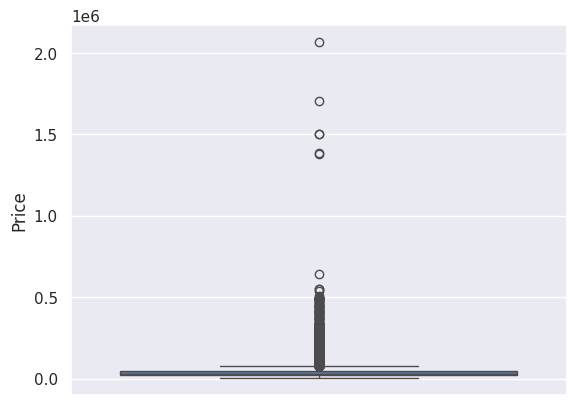

In [39]:
#now plotting a box plot for 'Price' Column in dataset
sns.boxplot(df1['Price'])
plt.show()

*Observation*:<br>
Here as you see that we got some values near to 1.5 and 2.0 . So these values are called outliers. Because there are away from the normal values.
Now we have detect the outliers of the feature of Price. Similarly we will checking of anothers features.


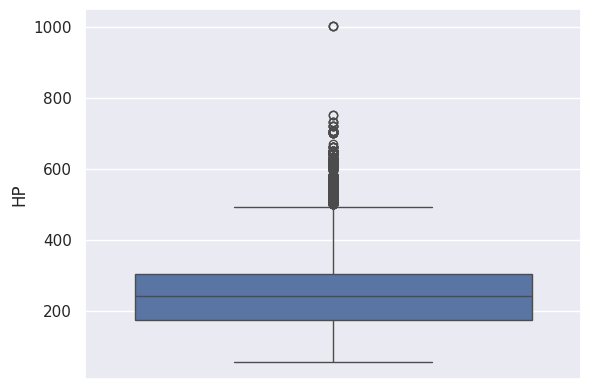

In [40]:
#Now plotting a box plot for 'HP' column in dataset
sns.boxplot(df1['HP'])
plt.show()

*Observation*:<br>
Here boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of HP.

In [41]:
#Now for the next step

Print all the columns which are of int or float datatype in df1.<br>
*Note*: You can use loc with condition

In [47]:
#Printing all the columns which are of int or float datatype
df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns

Index(['Year', 'HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Price'], dtype='object')

**Save the columns names of the new output in variable list name "l"**

In [45]:
#Saving the above list in a new variable
l = df1.loc[:, (df1.dtypes == 'int64') | (df1.dtypes == 'float64')].columns
#printing l to see wether it shows the data elements or not
l

Index(['Year', 'HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Price'], dtype='object')

# **Outliers removal technique using IQR method**

**The cool fact about you!**
IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

- Calculate IQR  and give a suitable threshold to remove the outliers and save this new dataframe into df2.

Let us help you to decide threshold: Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or above (Q3 + 1.5x IQR)m

In [61]:
# Select only numeric columns
df_numeric = df1.select_dtypes(include=['int64', 'float64'])

# Defining Q1 and Q3
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Removing outliers
df2 = df1[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.head()

,Model,Year,HP,Engine Cylinders,Type,Axles,highway MPG,city mpg,Price
Make,,,,,,,,,
BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [62]:
#Now finding the shape of df2
df2.shape

(9188, 9)

In [67]:
#Now finding the unique values and there counts in each column in df2 using value counts function
df2.nunique()
#as you can see below we have unique values and there counts
for i in df2.columns:
  print(i)
  print(df2[i].value_counts())

Model
Model
Silverado 1500    156
F-150             126
Sierra 1500        90
Tundra             78
Frontier           76
                 ... 
Sierra C3           1
STS-V               1
Tempo               1
V8                  1
Zephyr              1
Name: count, Length: 689, dtype: int64
Year
Year
2016    1746
2015    1710
2017    1391
2014     394
2009     320
2007     317
2012     298
2008     288
2013     270
2011     247
2010     247
2003     212
2004     212
2002     191
2005     190
2006     185
2001     154
1997     147
1998     143
2000     113
1999     108
1994     107
1995     101
1996      97
Name: count, dtype: int64
HP
HP
200.0    344
240.0    247
285.0    244
210.0    243
170.0    227
        ... 
151.0      1
102.0      1
163.0      1
451.0      1
361.0      1
Name: count, Length: 250, dtype: int64
Engine Cylinders
Engine Cylinders
6.0    3931
4.0    3812
8.0    1300
5.0     142
3.0       3
Name: count, dtype: int64
Type
Type
AUTOMATIC           6833
MANUAL          